# AnswerN0.1:

My views about the problem statement is that The problem states that as a data analyst at TechWorks Consulting which is
a consulting company that specializesin providing top-notch IT talent to a variety of businesses wants to hire some
professionals in its own company based on the given data of the candidates like their college name, previous CTC, role,
expected CTC and much more. We have been given the task of creating a machine learning modelwhich will help them in 
determining the salary of newly hired employees usingthe given data.

# AnswerN0.2: My approach to solving this task

First of all I will load the dataset and then replace the college field, city field into ML case Study dataset
and create dummy variable for Role.
And then, find out the outliers and missing values and clean the data further. After cleaned the data i will go for
machine learning models to define my approach and then perform all the tasks required step by step
to make the prediction, and then ultimately perform predictive analysis to predict the salary.

# AnswerN0.3:ML model options to perform this task

ML models available with us are like 
Linear Regression, Ridge, Lasso (for countinuous numerical variables)
Logistic Regression (LR), Linear Discriminant Ananlysis (LDA), K-Nearest Neighbour (KNN)
Regression tree for countinuous categorical variables
Classification tree for categorical variable 
are used to find where the accuracy of model is high and which model can be regard as best model

# AnswerN0.4: 

Model Bagging and Random Forest is the best of overall and the possible reason for that is Model Performance

# AnswerN0.5:
Tune the hyperparameters: Random Forest models have several hyperparameters that can be tuned to improve their
performance. Some of the important hyperparameters include the number of trees, the maximum depth of the trees, 
the minimum number of samples required to split an internal node, and the minimum number of samples required to be a
leaf node. You can use techniques such as grid search or random search to find the optimal values of these 
hyperparameters.
Feature selection: Random Forest models can be sensitive to irrelevant or redundant features.
You can use feature selection techniques such as correlation analysis, mutual information, or recursive feature
elimination to identify and remove such features from the dataset.
Ensemble learning: You can combine multiple Random Forest models to form an ensemble. Ensemble learning can help
improve the performance of the model by reducing overfitting and increasing the stability of the predictions
Cross-validation: Cross-validation can help estimate the performance of the Random Forest model on unseen data. 
You can use techniques such as k-fold cross-validation or leave-one-out cross-validation to evaluate the performance
of the model
Data preprocessing: Preprocessing the data can help improve the performance of the Random Forest model.
Some common preprocessing techniques include scaling the features, handling missing values, and encoding 
categorical variables
# steps can be take to improve this selected model’s performance even further

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns

In [7]:
df = pd.read_csv('C:/Users/MANISH KUMAR/Desktop/Y Finance/ML project/ML case Study.csv',header=0)

In [8]:
df2 = pd.read_csv('C:/Users/MANISH KUMAR/Desktop/Y Finance/ML project/Colleges.csv',header=0)

In [9]:
df3 = pd.read_csv('C:/Users/MANISH KUMAR/Desktop/Y Finance/ML project/cities.csv',header=0)

In [124]:
df2.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [125]:
df3.head()

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


# Checking for null values

In [10]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   object 
 1   City                 1589 non-null   object 
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   float64
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 99.4+ KB


In [12]:
# df have no null values

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tier 1  22 non-null     object
 1   Tier 2  28 non-null     object
 2   Tier 3  19 non-null     object
dtypes: object(3)
memory usage: 800.0+ bytes


In [14]:
# Creating lists using df2

Tier1=df2["Tier 1"].tolist()
Tier2=df2["Tier 2"].tolist()
Tier3=df2["Tier 3"].tolist()

In [15]:
# Removing rows containing null values
df2.dropna()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus
5,IIT Roorkee,IIIT Lucknow,"KIIT, Bhubaneswar"
6,IIT Guwahati,MNNIT Allahabad,Amity University
7,IIIT Hyderabad,Punjab Engineering College,"BMS College, Bangalore"
8,BITS Pilani (Pilani Campus),DAIICT,"PES University, Bangalore"
9,IIT Indore,MNIT Jaipur,"USIT, Delhi"


# Replacing college values with 1,2,3 according to Tiers in main dataset

In [16]:
for item in df.College:
    if item in Tier1:
        df["College"].replace(item, 1 ,inplace=True)
    elif item in Tier2:
        df["College"].replace(item, 2 ,inplace=True)
    elif item in Tier3:
        df["College"].replace(item, 3 ,inplace=True)

# Replacing City values with 1,2 according to Metro and non_metro in main dataset

In [17]:
# Creating lists using df3

Metro_city=df3["Metrio City"].tolist()
Non_Metro_city=df3["non-metro cities"].tolist()

In [18]:
# Removing rows containing null values
df3.dropna()

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode
5,Hyderabad,Rajpur Sonarpur
6,Ahmedabad,Kolhapur
7,Pune,Ajmer


In [19]:
 for item in df.City:
    if item in Metro_city:
        df["City"].replace(item, 1 ,inplace=True)
    elif item in Non_Metro_city:
        df["City"].replace(item,0,inplace=True)

In [20]:
df=pd.get_dummies(df)

In [21]:
del df['Role_Executive']

In [22]:
df.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
0,2,0,55523.0,3,66,19,71406.58,1
1,2,0,57081.0,1,84,18,68005.87,0
2,3,0,60347.0,2,52,28,76764.02,0
3,3,0,49010.0,2,81,33,82092.39,0
4,1,0,57879.0,4,74,32,73878.10,0


In [23]:
# Checking for null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   int64  
 1   City                 1589 non-null   int64  
 2   Previous CTC         1589 non-null   float64
 3   Previous job change  1589 non-null   int64  
 4   Graduation Marks     1589 non-null   int64  
 5   EXP (Month)          1589 non-null   int64  
 6   CTC                  1589 non-null   float64
 7   Role_Manager         1589 non-null   uint8  
dtypes: float64(2), int64(5), uint8(1)
memory usage: 88.6 KB


In [24]:
df.describe()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,1.975456,0.514160,55518.453744,2.528634,59.855255,39.044682,75353.278798,0.206419
std,0.838330,0.499957,6655.218445,1.123918,14.935139,14.108875,12587.288237,0.404862
min,1.000000,0.000000,36990.000000,1.000000,35.000000,18.000000,53020.320000,0.000000
25%,1.000000,0.000000,50518.000000,2.000000,46.000000,26.000000,66902.350000,0.000000
50%,2.000000,1.000000,55291.000000,3.000000,60.000000,39.000000,73028.670000,0.000000
75%,3.000000,1.000000,60109.000000,4.000000,73.000000,51.000000,80588.670000,0.000000
max,3.000000,1.000000,77911.000000,4.000000,85.000000,64.000000,123416.990000,1.000000


# Checking outlayers in the dataset

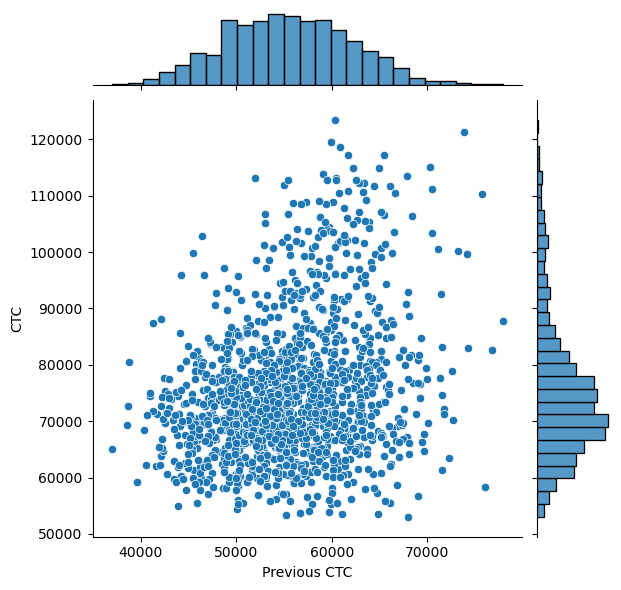

In [25]:
sns.jointplot(x= 'Previous CTC', y= 'CTC' , data= df)

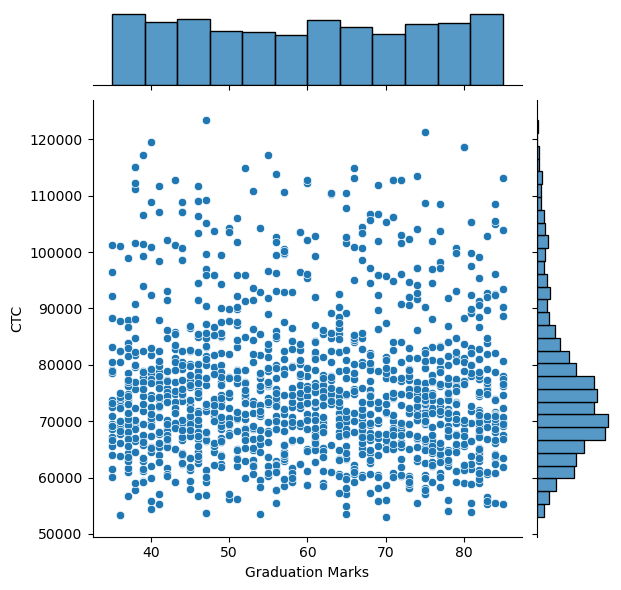

In [26]:
sns.jointplot(x= 'Graduation Marks', y= 'CTC' , data= df)

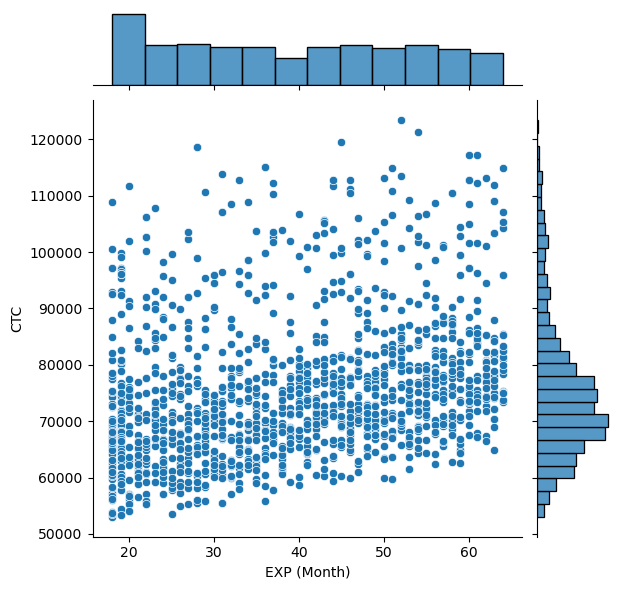

In [27]:
sns.jointplot(x= 'EXP (Month)', y= 'CTC' , data= df)

<AxesSubplot:ylabel='EXP (Month)'>

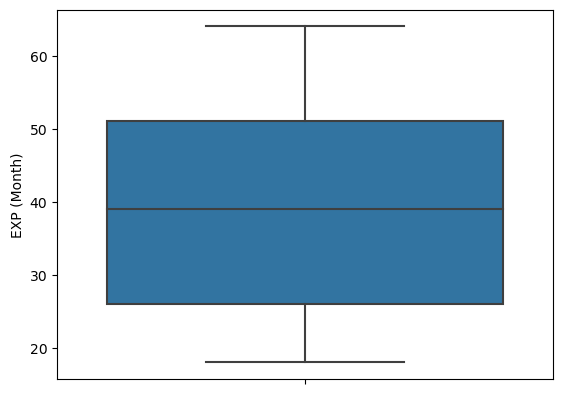

In [28]:
sns.boxplot(y="EXP (Month)",  data=df)

<AxesSubplot:ylabel='Graduation Marks'>

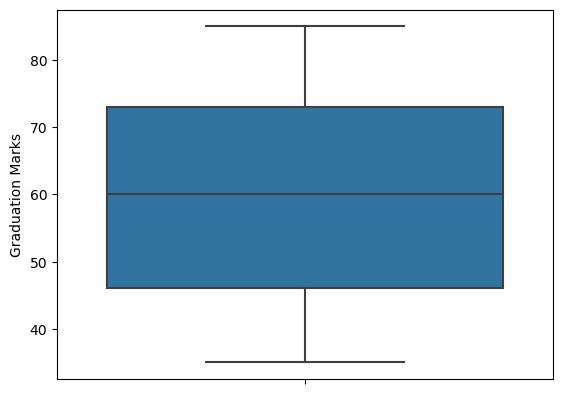

In [29]:
sns.boxplot(y="Graduation Marks",  data=df)

<AxesSubplot:ylabel='Previous CTC'>

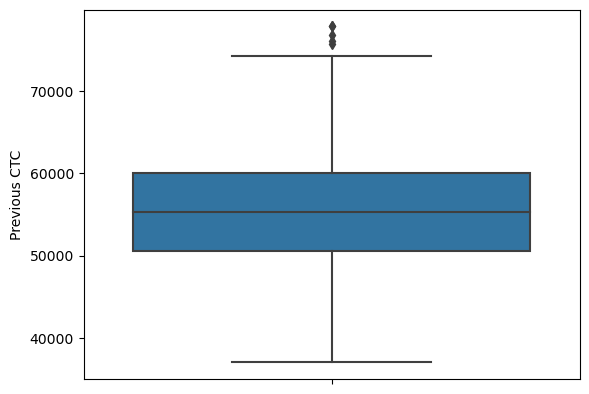

In [30]:
sns.boxplot(y="Previous CTC",  data=df)

<AxesSubplot:ylabel='CTC'>

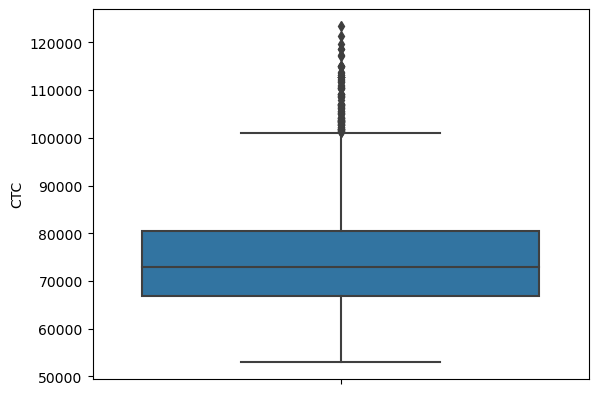

In [31]:
sns.boxplot(y="CTC",  data=df)

<AxesSubplot:xlabel='Previous job change', ylabel='count'>

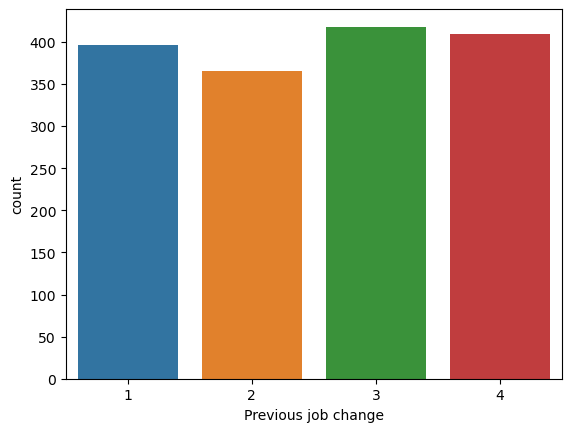

In [32]:
sns.countplot(x="Previous job change",  data=df)

<AxesSubplot:xlabel='Role_Manager', ylabel='count'>

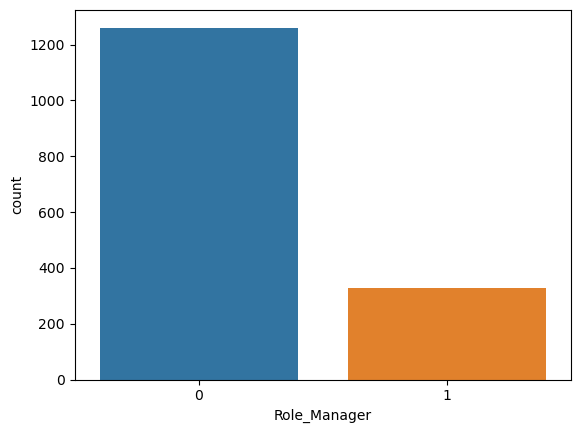

In [33]:
sns.countplot(x="Role_Manager", data=df)

<AxesSubplot:xlabel='College', ylabel='count'>

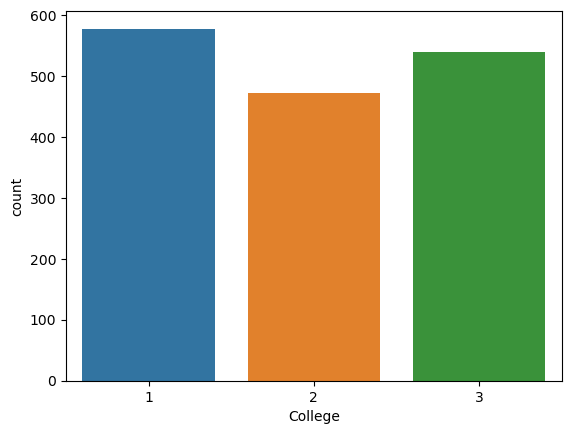

In [34]:
sns.countplot(x="College", data=df)

<AxesSubplot:xlabel='City', ylabel='count'>

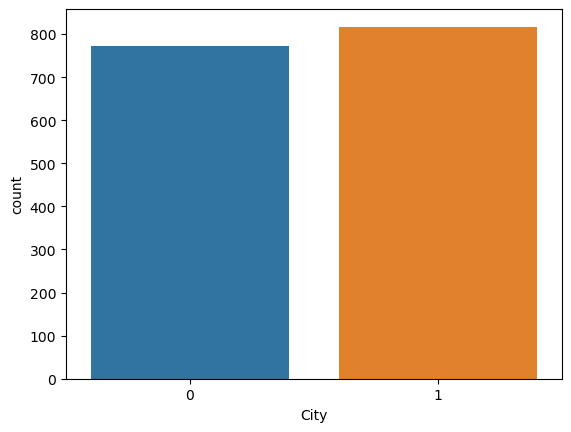

In [35]:
sns.countplot(x="City", data=df)

In [36]:
np.percentile(df.CTC,[99])

array([112826.26])

In [37]:
uv = np.percentile(df.CTC,[99])[0]

In [38]:
df[(df.CTC > uv)]

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
34,1,0,60894.0,4,80,28,118651.89,1
185,2,0,70258.0,4,38,36,115126.75,1
254,2,1,51912.0,2,66,50,113141.14,1
328,3,0,62264.0,2,52,64,114996.23,1
543,1,1,73856.0,1,75,54,121362.73,1
577,3,1,59101.0,3,56,31,113843.16,1
668,1,1,60476.0,1,85,62,113212.07,1
883,3,1,64930.0,1,66,51,114939.65,1
1146,1,1,61709.0,4,39,60,117207.24,1
1230,2,0,60298.0,1,47,52,123416.99,1


In [39]:
df.CTC[(df.CTC> 3*uv)]= 3*uv

C:\Users\MANISH KUMAR\AppData\Local\Temp\ipykernel_16764\3806643318.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.CTC[(df.CTC> 3*uv)]= 3*uv


In [40]:
np.percentile(df['Previous CTC'],[99])

array([71506.92])

In [41]:
uv1 = np.percentile(df['Previous CTC'],[99])[0]

In [42]:
df[(df['Previous CTC'] > uv1)]

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
116,3,1,77911.0,1,50,58,87831.62,0
292,3,0,74198.0,1,57,25,99644.51,1
543,1,1,73856.0,1,75,54,121362.73,1
572,1,1,71543.0,4,82,30,61366.78,0
701,2,0,71549.0,4,47,50,83116.21,0
847,1,1,71756.0,4,67,23,72141.43,0
860,1,1,75785.0,4,63,37,110338.25,1
941,3,1,72319.0,1,51,50,63538.43,0
1024,1,1,72661.0,3,74,47,70238.70,0
1047,1,0,73214.0,4,57,22,100119.53,1


In [43]:
df['Previous CTC'][(df['Previous CTC']> 3*uv)]= 3*uv

C:\Users\MANISH KUMAR\AppData\Local\Temp\ipykernel_16764\4226724535.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Previous CTC'][(df['Previous CTC']> 3*uv)]= 3*uv


In [44]:
df.describe()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,1.975456,0.514160,55518.453744,2.528634,59.855255,39.044682,75353.278798,0.206419
std,0.838330,0.499957,6655.218445,1.123918,14.935139,14.108875,12587.288237,0.404862
min,1.000000,0.000000,36990.000000,1.000000,35.000000,18.000000,53020.320000,0.000000
25%,1.000000,0.000000,50518.000000,2.000000,46.000000,26.000000,66902.350000,0.000000
50%,2.000000,1.000000,55291.000000,3.000000,60.000000,39.000000,73028.670000,0.000000
75%,3.000000,1.000000,60109.000000,4.000000,73.000000,51.000000,80588.670000,0.000000
max,3.000000,1.000000,77911.000000,4.000000,85.000000,64.000000,123416.990000,1.000000


# Finally saving this data file as Final_data

In [45]:
df.to_csv('Final_data.csv', index=False)

# Loading dataset

data = pd.read_csv('C:/Users/MANISH KUMAR/Desktop/Y Finance/ML project/Final_data.csv')

In [46]:
data.corr()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
College,1.000000,-0.014946,0.041979,-0.055060,0.003539,0.011752,-0.029592,-0.014749
City,-0.014946,1.000000,0.004644,0.051670,-0.018616,-0.023613,-0.020365,-0.048671
Previous CTC,0.041979,0.004644,1.000000,0.005756,-0.032976,0.119163,0.258000,0.012321
Previous job change,-0.055060,0.051670,0.005756,1.000000,0.019267,0.023488,0.011370,-0.017150
Graduation Marks,0.003539,-0.018616,-0.032976,0.019267,1.000000,-0.057061,-0.005450,0.017858
EXP (Month),0.011752,-0.023613,0.119163,0.023488,-0.057061,1.000000,0.301115,-0.026751
CTC,-0.029592,-0.020365,0.258000,0.011370,-0.005450,0.301115,1.000000,0.621311
Role_Manager,-0.014749,-0.048671,0.012321,-0.017150,0.017858,-0.026751,0.621311,1.000000


In [47]:
import statsmodels.api as sn

# Linear Regression with single predictor

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
lm = LinearRegression()

In [50]:
X = data[['CTC']]
y = data['Role_Manager']

In [51]:
lm.fit(X, y)

LinearRegression()

In [52]:
lm.intercept_ 

-1.2994469602929073

In [53]:
lm.coef_

array([1.99840819e-05])

In [54]:
print(lm.intercept_, lm.coef_)

-1.2994469602929073 [1.99840819e-05]


In [68]:
X_cons = sn.add_constant(X) 

In [69]:
lm_single = sn.OLS(y, X_cons).fit()

In [70]:
# Ckecking summary Using stats model

lm_single.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Role_Manager   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     997.8
Date:                Sat, 27 Jan 2024   Prob (F-statistic):          2.54e-170
Time:                        20:08:14   Log-Likelihood:                -429.84
No. Observations:                1589   AIC:                             863.7
Df Residuals:                    1587   BIC:                             874.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2994      0.048    -26.886      0.000      -1.394      -1.205
CTC         1.998e-05   6.33e-07     31.588      0.000    1.87e-05    2.12e-05
==============================================================================
Omnibus:                      252.001   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              394.964
Skew:                           1.079   Prob(JB):                     1.72e-86
Kurtosis:                       4.143   Cond. No.                     4.64e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.64e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Linear Regression with Multiple predictor

In [55]:
X_multi = data.drop("CTC",axis=1)
y_multi = data['CTC']

In [56]:
X_multi

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),Role_Manager
0,2,0,55523.0,3,66,19,1
1,2,0,57081.0,1,84,18,0
2,3,0,60347.0,2,52,28,0
3,3,0,49010.0,2,81,33,0
4,1,0,57879.0,4,74,32,0
...,...,...,...,...,...,...,...
1584,1,1,61285.0,3,44,60,0
1585,1,0,63140.0,1,44,24,0
1586,1,1,44907.0,1,60,19,0
1587,1,0,52054.0,2,67,29,0


In [57]:
y_multi

0       71406.58
1       68005.87
2       76764.02
3       82092.39
4       73878.10
          ...   
1584    77283.59
1585    68416.86
1586    70186.19
1587    73394.09
1588    70056.31
Name: CTC, Length: 1589, dtype: float64

In [123]:
np.asarray(data)

array([[2.000000e+00, 0.000000e+00, 5.552300e+04, ..., 1.900000e+01,
        7.140658e+04, 1.000000e+00],
       [2.000000e+00, 0.000000e+00, 5.708100e+04, ..., 1.800000e+01,
        6.800587e+04, 0.000000e+00],
       [3.000000e+00, 0.000000e+00, 6.034700e+04, ..., 2.800000e+01,
        7.676402e+04, 0.000000e+00],
       ...,
       [1.000000e+00, 1.000000e+00, 4.490700e+04, ..., 1.900000e+01,
        7.018619e+04, 0.000000e+00],
       [1.000000e+00, 0.000000e+00, 5.205400e+04, ..., 2.900000e+01,
        7.339409e+04, 0.000000e+00],
       [2.000000e+00, 1.000000e+00, 4.435300e+04, ..., 1.800000e+01,
        7.005631e+04, 1.000000e+00]])

In [58]:
X_multi_cons = sn.add_constant(X_multi) 

In [59]:
X_multi_cons.head()

,const,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),Role_Manager
0,1.0,2,0,55523.0,3,66,19,1
1,1.0,2,0,57081.0,1,84,18,0
2,1.0,3,0,60347.0,2,52,28,0
3,1.0,3,0,49010.0,2,81,33,0
4,1.0,1,0,57879.0,4,74,32,0


In [60]:
lm_multi = sn.OLS(y_multi, X_multi_cons).fit()

In [61]:
# Ckecking summary Using stats model

lm_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     259.1
Date:                Sat, 27 Jan 2024   Prob (F-statistic):          4.70e-257
Time:                        20:04:29   Log-Likelihood:                -16648.
No. Observations:                1589   AIC:                         3.331e+04
Df Residuals:                    1581   BIC:                         3.335e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.842e+04   2192.660     17.523      0.000    3.41e+04    4.27e+04
College              -481.5147    258.382     -1.864      0.063    -988.321      25.292
City                  380.8308    433.455      0.879      0.380    -469.377    1231.039
Previous CTC            0.4101      0.033     12.526      0.000       0.346       0.474
Previous job change   126.5653    192.887      0.656      0.512    -251.776     504.906
Graduation Marks        6.2362     14.502      0.430      0.667     -22.208      34.681
EXP (Month)           261.3444     15.460     16.904      0.000     231.020     291.669
Role_Manager         1.949e+04    534.694     36.446      0.000    1.84e+04    2.05e+04
==============================================================================
Omnibus:                       49.726   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.299
Skew:                           0.408   Prob(JB):                     9.82e-13
Kurtosis:                       3.411   Cond. No.                     5.68e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
# Ckecking Intercept and cofficient Using Linear Regression

In [72]:
lm2 = LinearRegression()

In [73]:
lm2.fit(X_multi, y_multi)

LinearRegression()

In [74]:
lm2.intercept_ 

38421.10980689989

In [75]:
lm2.coef_

array([-4.81514705e+02,  3.80830787e+02,  4.10090279e-01,  1.26565295e+02,
        6.23621203e+00,  2.61344394e+02,  1.94874279e+04])

In [76]:
print(lm2.intercept_, lm2.coef_)

38421.10980689989 [-4.81514705e+02  3.80830787e+02  4.10090279e-01  1.26565295e+02
  6.23621203e+00  2.61344394e+02  1.94874279e+04]


In [77]:
data.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
0,2,0,55523.0,3,66,19,71406.58,1
1,2,0,57081.0,1,84,18,68005.87,0
2,3,0,60347.0,2,52,28,76764.02,0
3,3,0,49010.0,2,81,33,82092.39,0
4,1,0,57879.0,4,74,32,73878.10,0


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   int64  
 1   City                 1589 non-null   int64  
 2   Previous CTC         1589 non-null   float64
 3   Previous job change  1589 non-null   int64  
 4   Graduation Marks     1589 non-null   int64  
 5   EXP (Month)          1589 non-null   int64  
 6   CTC                  1589 non-null   float64
 7   Role_Manager         1589 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 99.4 KB


In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi,test_size=0.2,random_state=0)

In [81]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1271, 7) (318, 7) (1271,) (318,)


# After traning on Linear Regression  Checking model performance

In [82]:
ln_a=LinearRegression()

In [83]:
ln_a.fit(X_train,y_train)

LinearRegression()

In [84]:
y_test_a=ln_a.predict(X_test)
y_train_a=ln_a.predict(X_train)

In [85]:
from sklearn.metrics import r2_score

In [86]:
r2_score(y_train, y_train_a)

0.5331293335456955

In [87]:
r2_score(y_test, y_test_a)

0.5355989894790061

In [88]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

# Checking Ridge model performance

In [89]:
from sklearn.linear_model import Ridge

In [90]:
lm_r = Ridge(alpha = 0.5)

In [91]:
lm_r.fit(X_train_s,y_train)

Ridge(alpha=0.5)

In [92]:
r2_score(y_test, lm_r.predict(X_test_s))

0.5355848845406526

In [93]:
# To improve  model performance

from sklearn.model_selection import validation_curve

In [94]:
param_range = np.logspace(-2,8,100)

In [95]:
# to take help from "validation_curve?""

train_scores, test_scores = validation_curve(Ridge(), X_train_s, y_train, param_name="alpha", param_range=param_range, scoring='r2')

In [96]:
print(train_scores,test_scores)

[[5.26336205e-01 5.33395314e-01 5.39739989e-01 5.37993452e-01
  5.30456031e-01]
 [5.26336205e-01 5.33395314e-01 5.39739989e-01 5.37993452e-01
  5.30456031e-01]
 [5.26336205e-01 5.33395314e-01 5.39739989e-01 5.37993452e-01
  5.30456031e-01]
 [5.26336205e-01 5.33395313e-01 5.39739989e-01 5.37993452e-01
  5.30456031e-01]
 [5.26336205e-01 5.33395313e-01 5.39739989e-01 5.37993451e-01
  5.30456031e-01]
 [5.26336205e-01 5.33395313e-01 5.39739989e-01 5.37993451e-01
  5.30456030e-01]
 [5.26336204e-01 5.33395313e-01 5.39739988e-01 5.37993451e-01
  5.30456030e-01]
 [5.26336204e-01 5.33395312e-01 5.39739988e-01 5.37993450e-01
  5.30456030e-01]
 [5.26336203e-01 5.33395312e-01 5.39739987e-01 5.37993450e-01
  5.30456029e-01]
 [5.26336202e-01 5.33395311e-01 5.39739986e-01 5.37993448e-01
  5.30456028e-01]
 [5.26336200e-01 5.33395309e-01 5.39739984e-01 5.37993446e-01
  5.30456026e-01]
 [5.26336197e-01 5.33395306e-01 5.39739981e-01 5.37993443e-01
  5.30456022e-01]
 [5.26336192e-01 5.33395301e-01 5.397399

In [97]:
train_mean = np.mean(train_scores,axis=1)

In [98]:
test_mean  = np.mean(test_scores,axis=1) 

In [99]:
max(train_mean)

0.5335841980711626

In [100]:
max(test_mean) 

0.5258291929838951

# other way to see r2 value

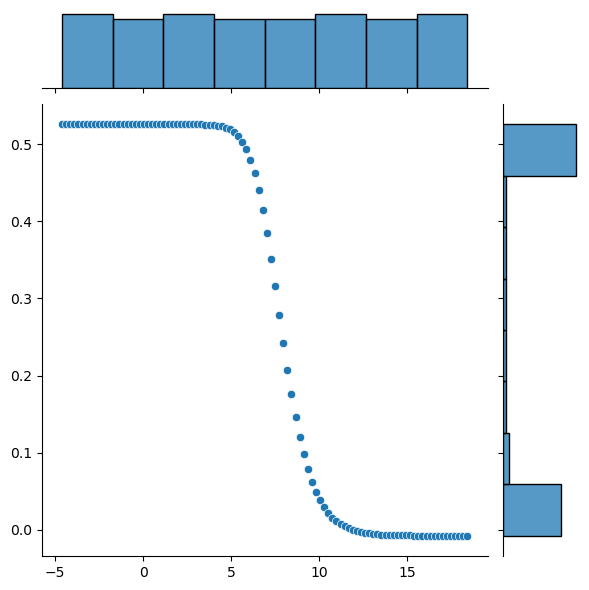

In [101]:
sns.jointplot(x=np.log(param_range), y=test_mean)

In [102]:
# To find location of test_mean

np.where(test_mean == max(test_mean))

(array([26], dtype=int64),)

In [103]:
param_range[26]

4.229242874389499

In [104]:
lm_r_best = Ridge(alpha = param_range[26])

In [105]:
lm_r_best.fit(X_train_s,y_train) 

Ridge(alpha=4.229242874389499)

In [106]:
r2_score(y_test, lm_r_best.predict(X_test_s))

0.535475412672408

In [107]:
r2_score(y_train, lm_r_best.predict(X_train_s)) 

0.5331238227310131

# Checking Lasso model performance

In [108]:
from sklearn.linear_model import Lasso

In [109]:
lm_l = Lasso(alpha = 0.4)

In [110]:
lm_l.fit(X_train_s,y_train)

Lasso(alpha=0.4)

In [111]:
r2_score(y_test, lm_l.predict(X_test_s))

0.5356042489636199

In [112]:
# To improve model performance

train_scores, test_scores = validation_curve(Lasso(), X_train_s, y_train, param_name="alpha", param_range=param_range, scoring='r2')

In [113]:
print(train_scores,test_scores)

[[0.52633621 0.53339531 0.53973999 0.53799345 0.53045603]
 [0.52633621 0.53339531 0.53973999 0.53799345 0.53045603]
 [0.52633621 0.53339531 0.53973999 0.53799345 0.53045603]
 [0.52633621 0.53339531 0.53973999 0.53799345 0.53045603]
 [0.52633621 0.53339531 0.53973999 0.53799345 0.53045603]
 [0.52633621 0.53339531 0.53973999 0.53799345 0.53045603]
 [0.52633621 0.53339531 0.53973999 0.53799345 0.53045603]
 [0.52633621 0.53339531 0.53973999 0.53799345 0.53045603]
 [0.52633621 0.53339531 0.53973999 0.53799345 0.53045603]
 [0.5263362  0.53339531 0.53973999 0.53799345 0.53045603]
 [0.5263362  0.53339531 0.53973999 0.53799345 0.53045603]
 [0.5263362  0.53339531 0.53973999 0.53799345 0.53045603]
 [0.5263362  0.53339531 0.53973999 0.53799345 0.53045603]
 [0.5263362  0.53339531 0.53973999 0.53799345 0.53045603]
 [0.5263362  0.53339531 0.53973999 0.53799345 0.53045603]
 [0.5263362  0.53339531 0.53973998 0.53799345 0.53045603]
 [0.5263362  0.53339531 0.53973998 0.53799344 0.53045602]
 [0.52633619 0

In [114]:
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

In [115]:
print(train_scores_mean, test_scores_mean )

[0.5335842  0.5335842  0.5335842  0.5335842  0.5335842  0.5335842
 0.5335842  0.5335842  0.5335842  0.5335842  0.5335842  0.5335842
 0.5335842  0.5335842  0.5335842  0.53358419 0.53358419 0.53358419
 0.53358418 0.53358417 0.53358415 0.53358412 0.53358408 0.53358401
 0.5335839  0.53358373 0.53358345 0.533583   0.53358229 0.53358116
 0.53357936 0.53357649 0.53357193 0.53356486 0.53355367 0.5335363
 0.53350867 0.53346468 0.53339487 0.53328788 0.53312177 0.53287261
 0.53248778 0.53192325 0.53108545 0.52990918 0.52819818 0.5256632
 0.52245597 0.51744466 0.50946523 0.49675975 0.47652898 0.44431586
 0.39302354 0.31754415 0.25034069 0.17442286 0.05354021 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.

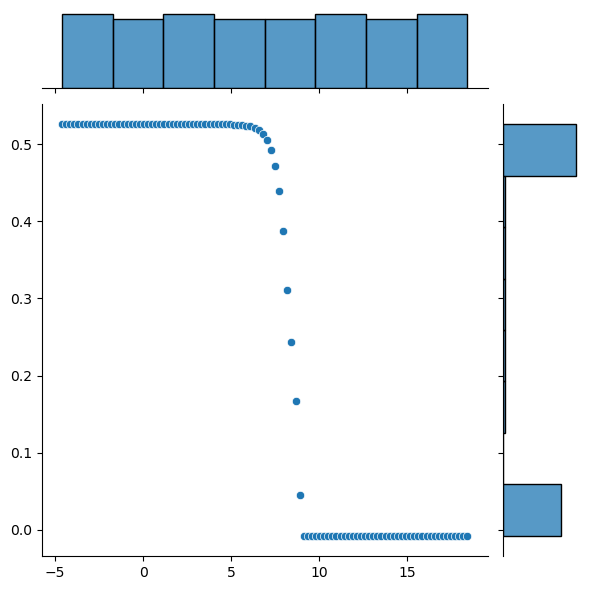

In [116]:
sns.jointplot(x=np.log(param_range), y=test_scores_mean)

In [117]:
# To find location of test_mean

np.where(test_mean == max(test_scores_mean))

(array([], dtype=int64),)

In [118]:
param_range[36]

43.28761281083057

In [119]:
# At index 36 we getting best fit

lm_l_best = Lasso(alpha = param_range[36])

In [120]:
lm_l_best.fit(X_train_s,y_train) 

Lasso(alpha=43.28761281083057)

In [121]:
 r2_score(y_test, lm_l_best.predict(X_test_s))

0.5360908337999819

In [122]:
r2_score(y_train, lm_l_best.predict(X_train_s))

0.5330506384208464

# Linear Regression performance   :  0.5355
# Ridge model performance             :  0.5360
# Lasso model performance             :  0.5356

# Hence Ridge model is best here